In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [ ]:
url = 'Dataset/shopping_behavior_updated.csv'
data = pd.read_csv(url)

data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [3]:
# KONVERSI MATA UANG PUND KE RUPIAH

kurs = 22264
data['price_idr'] = data['price'] * kurs

# FORMAT MATA UANG RUPIAH

def format_rupiah(p):
    return "Rp {:,}".format(p).replace(",", ".")

data["price_idr"] = data["price_idr"].apply(format_rupiah)

# CEK MATA UANG RUPIAH

print(data['price_idr'].head)

<bound method NDFrame.head of 0       Rp 356.224.000
1       Rp 356.112.680
2       Rp 311.651.472
3       Rp 422.971.472
4       Rp 389.575.472
             ...      
6733    Rp 122.452.000
6734    Rp 110.986.040
6735    Rp 111.208.680
6736     Rp 88.944.680
6737    Rp 100.076.680
Name: price_idr, Length: 6738, dtype: object>


In [4]:
# CEK DATA YANG HILANG

print(data.isnull().sum())
print("Apakah data ada yang hilang?", data.isnull().values.any())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price_idr       0
dtype: int64
Apakah data ada yang hilang? False


In [5]:
# MENENTUKAN DATA TRAIN DAN TEST

fitur = ['model', 'year',
        'transmission', 'mileage', 
        'fuelType', 'tax', 'mpg', 'engineSize']

x = data[fitur]
y = data['price']

# MENJADIKAN DATA TYPE BUKAN NUMERIK MENJADI KOLOM PATOKAN (one-hot)
x = pd.get_dummies(x, columns=["model","transmission","fuelType"], drop_first=True)
print("\nJumlah fitur setelah One-Hot:", x.shape[1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"\nBENTUK DARI X_TRAIN : {x_train.shape}")
print(f"BENTUK DARI X_TEST: {x_test.shape}")
print(f"BENTUK DARI Y_TRAIN : {y_train.shape}")
print(f"BENTUK DARI Y_TEST: {y_test.shape}")


Jumlah fitur setelah One-Hot: 28

BENTUK DARI X_TRAIN : (5390, 28)
BENTUK DARI X_TEST: (1348, 28)
BENTUK DARI Y_TRAIN : (5390,)
BENTUK DARI Y_TEST: (1348,)


In [6]:
# MODELING

model = LinearRegression()
# MELATIH MODEL
model.fit(x_train, y_train)
# PREDIKSI MENGGUNAKAN DATA TEST
y_pred = model.predict(x_test)

In [7]:
# EVALUASI METRIK

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\n===== HASIL EVALUASI =====")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


===== HASIL EVALUASI =====
Mean Squared Error (MSE): 3126829.2198005407
Root Mean Squared Error (RMSE): 1768.2842587662597
R-Squared (R2): 0.926524825201737
Mean Absolute Percentage Error (MAPE): 0.11030375532735934


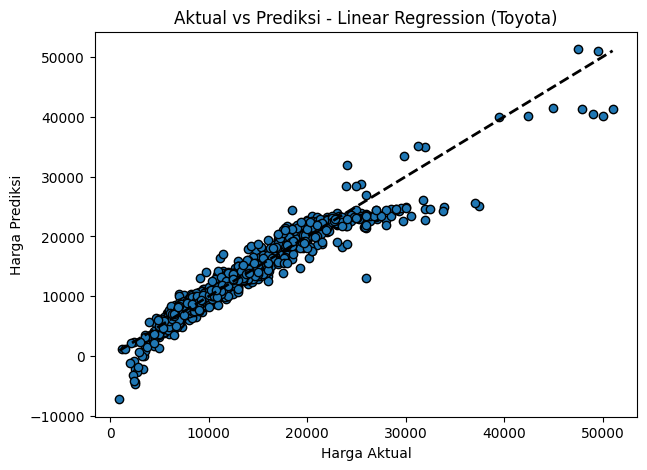

In [8]:
# VISUALISASI MODEL

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, edgecolors=(0,0,0))
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'k--', lw=2)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Aktual vs Prediksi - Linear Regression (Toyota)")
plt.show()